<a href="https://colab.research.google.com/github/garciasergio94y/RNN/blob/LSTM_onehot_QC/LSTM_onehot_QC_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Instalación y carga de librerías:

packages <- c("readr", "readxl", "purrr", "dplyr", "filesstrings",
              "stringr", "tidyr", "lubridate", "ggplot2", #"caret",
              "tictoc", "wavelets", "reticulate", "abind",
              "tensorflow", "tfdatasets", "keras")

# Función para instalar paquetes si no están ya instalados
install_packages <- function(package) {
  if (!require(package, character.only = TRUE)) {
    install.packages(package)
    }
}

# Aplicar la función para cada uno de los paquetes
lapply(packages, install_packages)

require(readr)
require(readxl)
require(purrr)
require(dplyr)
require(filesstrings)
require(stringr)
require(tidyr)
require(lubridate)
require(ggplot2)
require(caret)
require(wavelets)
require(tictoc)
require(reticulate)
require(abind)
require(tensorflow)
require(tfdatasets)
require(keras)


Loading required package: readr

Loading required package: readxl

Loading required package: purrr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: filesstrings

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘filesstrings’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘strex’


Loading required package: stringr

Loading required package: tidyr

Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: ggplot2

Loading required package: tictoc

Warning message in library(package, lib

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

Loading required package: filesstrings


Attaching package: ‘filesstrings’


The following object is masked from ‘package:dplyr’:

    all_equal


Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Loading required package: wavelets

Loading required package: tictoc

Loading required package: reticulate

Loading required package: abind

Loading required package: tensorflow

Loading required package: tfdatasets

Loading required package: keras



In [3]:
workingdir <- getwd()
datadir <- file.path(workingdir, "Datos/daily_s")
eventdir <- file.path(workingdir, "Datos/daily_s/Event")
eventdir_old <- file.path(workingdir, "Datos/daily_s/Event/old")
lotdir <- file.path(workingdir, "Datos/daily_s/Lot")
lotdir_old <- file.path(workingdir, "Datos/daily_s/Lot/old")
qcdir <- file.path(workingdir, "Datos/daily_s/qc")
qcdir_old <- file.path(workingdir, "Datos/daily_s/qc/old")
resultsdir <- file.path(workingdir, "Resultados")

In [ ]:
tensorflow::tf_gpu_configured()

TensorFlow built with CUDA:  TRUE 
GPU device name:  /device:GPU:0

[1] TRUE

Lectura de archivos de datos

In [4]:
# Leer archivo dataset desde Github:
url <- "https://raw.githubusercontent.com/garciasergio94y/RNN/LSTM_onehot_QC/Resultados/qc_data_sel_wl?token=GHSAT0AAAAAACDFXH5LJ7YOBL4BSAL5E4BKZDT5OMA"
qc_data_sel_wl <- read.csv(url)

# Guardar una copia local:
write.csv(qc_data_sel_wl, file = "qc_data_sel_wl", row.names = F, col.names = F)


Warning message in write.csv(qc_data_sel_wl, file = "qc_data_sel_wl", row.names = F, :
“attempt to set 'col.names' ignored”


In [5]:
# Convertir fechas en formato POSIXct y niveles de QC en chr:

qc_data_sel_wl[,1] %<>% as.POSIXct(tz = "Europe/Madrid")
qc_data_sel_wl$NIVEL %<>% as.character()
head(qc_data_sel_wl)

,TIEMPO_QC,QC_RESULT,W1,W2,W3,W4,W5,W6,W7,V1,V2,V3,V4,V5,V6,V7,ANALIZADOR,CODIGO_PRUEBA,NOMBRE_PRUEBA,NIVEL
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,2022-03-01 10:15:32,0.756,-5.256767,4.635973,-7.0963537,-1.4089131,-2.831461,-0.020687059,-0.13798708,12.543821,8.963229,9.883923,13.48489,11.05025,11.17946,12.40968,DXI800 num 1,CLC00033,Tirotropina #TSH,1
2,2022-03-01 09:58:44,0.750,-1.088411,-7.365680,-7.5892368,-0.6040175,-2.930563,-0.008832360,-0.12566793,15.921489,14.190394,10.460782,13.38209,11.16218,11.17760,12.40045,DXI800 num 1,CLC00033,Tirotropina #TSH,1
3,2022-03-01 09:13:08,0.707,15.077506,-12.447274,-4.9952082,0.2075476,-2.966887,0.002063882,-0.11341338,6.735010,19.529842,11.033837,13.25855,11.27737,11.17604,12.39136,DXI800 num 1,CLC00033,Tirotropina #TSH,1
4,2022-03-01 10:19:17,6.021,-10.178506,-5.118902,-0.4112897,0.8945995,-2.937938,0.011821657,-0.10126206,6.186578,22.231911,11.437126,13.11262,11.39455,11.17477,12.38243,DXI800 num 1,CLC00033,Tirotropina #TSH,2
5,2022-03-01 10:00:05,5.943,-8.716737,9.917385,3.8427090,1.4175981,-2.846321,0.020160724,-0.08926708,16.988792,21.659853,11.613726,12.94885,11.51263,11.17377,12.37365,DXI800 num 1,CLC00033,Tirotropina #TSH,2
6,2022-03-01 09:15:14,5.882,17.989157,15.769433,5.8808384,1.7764004,-2.695368,0.026389251,-0.07752756,22.532139,18.725006,11.632671,12.77329,11.63037,11.17306,12.36503,DXI800 num 1,CLC00033,Tirotropina #TSH,2


Definición de funciones para transformación de variables, normalización y secuenciación de series de datos:

In [6]:
# Función de normalización de las variables continuas y eliminación de coeficientes wavelet con valores NA. Se definen dos funciones, una para el set de training y otra para los sets de test y validación. La diferencia es que la de train devuelve vectores de medias y de desviaciones estándar que luego se usan como argumentos en las otras. De esta forma, el escalado y normalización se realiza con la misma media y desviación del set de entrenamiento para los otros dos datasets:

normalize_train <- function(data) {

  # Identificar las columnas que empiezan por W y la columna 'RESULTADO'
  wavelet_cols <- grep("^[WV]", colnames(data), value = TRUE)
  result_col <- "QC_RESULT"

  # Calcular medias y desviaciones estándar por grupos de pruebas y   analizador:
  means <- data %>%
    group_by(ANALIZADOR, CODIGO_PRUEBA) %>%
    summarise(across(c(result_col, wavelet_cols),
                     ~mean(., na.rm = T)))

  std_devs <- data %>%
    group_by(ANALIZADOR, CODIGO_PRUEBA) %>%
    summarise(across(c(result_col, wavelet_cols),
                     ~sd(., na.rm = T)))

  # Normalizar las columnas de resultado y coeficientes wavelet
  norm_data <- data %>%
    group_by(ANALIZADOR, CODIGO_PRUEBA) %>%
    mutate(across(c(result_col, wavelet_cols), scale))%>%
    mutate(across(wavelet_cols,
                           ~ifelse(is.na(.), -99999, .))) %>%
    ungroup()

  # Devolver el dataframe escalado y las medias y desviaciones estándar:

  return(list(scaled_data = as.data.frame(norm_data),
              means = means, stdev = std_devs))
}

In [7]:
# Función de normalización para los datos de validación y test, con eliminación de valores NA en los wavelets:

norm_test_val <- function(data, means, stds) {

  # Identificar las columnas numéricas y seleccionarlas
  wavelet_cols <- grep("^[WV]", colnames(data), value = TRUE)
  result_col <- "QC_RESULT"
  test_cols <- "CODIGO_PRUEBA"

  cols <- c(result_col, wavelet_cols, test_cols)

  # Seleccionar medias y desviaciones de resultados y coeficientes   wavelet:
  means_r <- train_n$means
  stds_r <- train_n$stdev
  means_wl <- train_n$means[wavelet_cols]
  stds_wl <- train_n$stdev[wavelet_cols]

  # Normalizar por cada prueba las columnas de resultado y coeficientes wavelet usando las medias y desviaciones estándar de train suministradas:
  means <- data %>%
    group_by(ANALIZADOR, CODIGO_PRUEBA) %>%
    left_join(means_r, by = c("ANALIZADOR", "CODIGO_PRUEBA"),
              suffix = c(".val", ".means")) %>%
     ungroup()

  stds <- data %>%
    group_by(ANALIZADOR, CODIGO_PRUEBA) %>%
     left_join(stds_r, by = c("ANALIZADOR", "CODIGO_PRUEBA"),
               suffix = c(".val", ".sd")) %>%
    ungroup()


  norm_data <- data %>%
    mutate(., RESULTADO.st =
             (.[,result_col]-
                select(means,
                       starts_with(result_col) &
                       ends_with(".means"))) /
                select(stds,
                       starts_with(result_col) &
                       ends_with(".sd"))
           ) %>%
    mutate(WAVELETS.st =
             across(all_of(wavelet_cols),
                    ~ (. - select(means,
                                  starts_with(cur_column()) &
                                    ends_with(".means"))[[1]]) /
                      select(stds,
                             starts_with(cur_column()) &
                               ends_with(".sd"))[[1]])
           ) %>%
    select(-c(result_col, wavelet_cols)) %>%
    unnest(c(WAVELETS.st, RESULTADO.st)) %>%
    relocate(starts_with("QC_"), .after = 1) %>%
    relocate(starts_with("W"), .after = 2) %>%
    relocate(starts_with("V"), .before = ANALIZADOR)

  names(norm_data)[2]<-result_col

  return(as.data.frame(norm_data))
}



## Función ```code_cat_var```.

Función para convertir las variables categóricas tipo string en vectores numéricos y codificarlas (one hot), así como normalizar los valores de las variables continuas, creando una lista que retiene en un vector la información de los niveles de los factores

In [8]:
code_cat_var <- function(data) {
  # Eliminación de la columna CODIGO_PRUEBA si solo tiene una          categoría:
  if(length(unique(data$CODIGO_PRUEBA))==1){
    data %<>% select(., -CODIGO_PRUEBA)
    }


  # Detección de strings:
  cat_vars <- which(sapply(data, is.character))
  # Conversión a factores:
  data_cat <- lapply(data[,cat_vars], as.factor)
  # Extracción de niveles:
  levels <- lapply(data_cat, levels)

  # Codificar one-hot todas las variables factor:
  encoded_cols <- lapply(seq_along(data_cat), function(i) {
    cols <- model.matrix(~ factor(data_cat[[i]]) - 1)
    colnames(cols) <- paste0(names(data)[cat_vars[i]], "_",
                             levels[[i]])
    cols
    })

  # Unir columnas codificadas con conjunto de datos original:
  if (!"CODIGO_PRUEBA" %in% names(data)) {
    data_encoded <- bind_cols(data %>%
                                select(-all_of(cat_vars)),
                                encoded_cols)
    } else {
      data_encoded <-  bind_cols(data %>%
                                   select(c(-all_of(cat_vars),
                                            -"CODIGO_PRUEBA")),
                                 encoded_cols)
      }

  return(list(data = data_encoded, levels = levels))
}

In [9]:
# Función para crear un índice de casos únicos de combinaciones de ANALIZADOR, CÓDIGO_PRUEBA y NIVEL:

unique_lab_cases <- function(df, categorical_vars) {
  unique_groups <- unique(df[categorical_vars])

  code <- apply(unique_groups, 1, function(row) {
    paste0(ifelse(row == 1, 1, 0), collapse = "")
  })
  unique_groups %<>% mutate(., code)
  coded_df <- df %>%
    merge(unique_groups, ., by = colnames(unique_groups)
          [-length(colnames(unique_groups))])
  coded_df <- coded_df[, c(colnames(df), "code")]

  return(coded_df)
}


In [10]:
# Función para creación de lotes de series temporales de longitud k (lookback)

create_lstm_data.2 <-
  function(data, lookback, delay, min_index, max_index,
           shuffle = FALSE, batch_size, step = 1,
           predseries) {

  if (is.null(max_index)) max_index <- nrow(data) - delay - 1
  i <- min_index + lookback
  function() {
    if (shuffle) {
      rows <- sample(c((min_index+lookback):max_index),
                     size = batch_size)
    } else {
      if (i + batch_size > max_index)
        i <<- min_index + lookback
      rows <- c(i:min(i+batch_size, max_index))
      i <<- i + length(rows)
}
    samples <- array(0, dim = c(length(rows),
                                lookback / step,
                                dim(data)[[-1]]))
    targets <- array(0, dim = c(length(rows)))

    for (j in 1:length(rows)) {
      indices <- (rows[[j]] - lookback + 1):(rows[[j]])
      samples[j,,] <- data[indices, ]
      targets[[j]] <- data[rows[[j]] + delay,predseries]
    }
    list(samples, targets)
  }
}


In [11]:
# Se divide el dataset en 50% de datos para entrenamiento, 25% para test y 25% para validación.
# Para evitar fraccionar las unidades temporales diarias usamos percentiles de la secuencia temporal en días:

time_point_50 <- as.POSIXct(as.Date(
  quantile(qc_data_sel_wl[[1]], 0.5)))

time_point_75 <- as.POSIXct(as.Date(
  quantile(qc_data_sel_wl[[1]], 0.75)))

time_point_50
time_point_75

             50% 
"2022-10-04 UTC" 

             75% 
"2023-01-20 UTC" 

In [12]:
# Muestra de entrenamiento:
train_n <- qc_data_sel_wl %>%
  subset(.[[1]] <= time_point_75) %>%
  # Normalización del dataset y eliminación de coeficientes
  # wavelet con valor NA:
  normalize_train()

Warning message:
“There were 2 warnings in `summarise()`.
The first warning was:
ℹ In argument: `across(c(result_col, wavelet_cols), ~mean(., na.rm = T))`.
Caused by warning:
! Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(result_col)

  # Now:
  data %>% select(all_of(result_col))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
`summarise()` has grouped output by 'ANALIZADOR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ANALIZADOR'. You can override using the
`.groups` argument.


In [13]:
# Muestra de validación:
val_n <- qc_data_sel_wl %>%
  subset(
    #.[[1]] > time_point_50 &
    .[[1]] > time_point_75) %>%
  # Normalización del dataset y eliminación de coeficientes
  # wavelet con valor NA:
  norm_test_val(means = train_n$means, stds = train_n$stdev)

In [15]:
# Muestra de test:
test <- qc_data_sel_wl %>%
  subset(.[[1]] > time_point_75)
  # Normalización del dataset y eliminación de coeficientes
  # wavelet con valor NA:
test_n <- test %>% norm_test_val(means = train_n$means, stds = train_n$stdev)

In [16]:
# Codificación onehot sin wavelets

train_code <- code_cat_var(
  train_n$scaled_data[,-c(3:16, 19)])

val_code <- code_cat_var(val_n[,-c(3:16, 19)])

test_code <- code_cat_var(test_n[,-c(3:16, 19)])

## Uso de generadoras directas:

In [30]:
train_data <- as.matrix(train_code$data[,-1])
lookback <- 20
batch_size <- 100
delay <- 1
min_index <- 1
predseries <- 1

train_k <-  create_lstm_data.2(
    data = train_data,
    lookback = lookback,
    delay = delay,
    batch_size = batch_size,
    min_index = min_index,
    max_index = NULL,
    predseries = predseries)

# Cálculo del número de steps de training:
train_steps <- round((nrow(train_data)-lookback) / batch_size)

In [31]:
val_data <- as.matrix(val_code$data[,-1])

val_k <- create_lstm_data.2(
    data = val_data,
    lookback = lookback,
    delay = delay,
    batch_size = batch_size,
    min_index = min_index,
    max_index = NULL,
    predseries = predseries)

# Cálculo del número de steps de training:
val_steps <- round((nrow(val_data)-lookback) / batch_size)

In [32]:
test_data <- as.matrix(test_code$data[,-1])

test_k <-  create_lstm_data.2(
    data = test_data,
    lookback = lookback,
    delay = delay,
    batch_size = batch_size,
    min_index = min_index,
    max_index = NULL,
    predseries = predseries)


# Cálculo del número de steps de training:
test_steps <- round((nrow(test_data)-lookback) / batch_size)

In [41]:
set.seed(123)

nkp <- dim(train_k()[[1]])

k <- nkp[2]
p <- nkp[3]

input_shape <- c(NA, k, p)

model_0 <- keras_model_sequential() %>%
   #layer_masking(mask_value = -99999, input_shape = c(NULL, k, p)) %>%
   layer_lstm(units = 8,
              #dropout=0.8,
            #  recurrent_dropout=0.1,
              #kernel_regularizer = regularizer_l2(l=0.01),
              return_sequences = F,
              input_shape = c(NULL, k, p)) %>%
    #layer_lstm(units = 64,
     #          dropout=0.8,
      #         recurrent_dropout=0.5) %>%
    layer_dense(units = 1,
                activation = "sigmoid")

summary(model_0)

Model: "sequential_2"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 lstm_2 (LSTM)                      (None, 8)                       1344        
 dense_2 (Dense)                    (None, 1)                       9           
Total params: 1,353
Trainable params: 1,353
Non-trainable params: 0
________________________________________________________________________________


In [42]:
K <- keras::backend()

rmse <- function(y_pred, y_true) {
  sq_diff <- K$square(y_pred - y_true)
  mean_sq_diff <- K$mean(sq_diff)
  rmse_value <- K$sqrt(mean_sq_diff)
  return(rmse_value)
}

attr(rmse, "py_function_name") <- "rmse"


In [43]:
model_0 %<>% compile(
    optimizer = "adam",
    loss="mse",
    metrics = list("mae",
                   "mse",
                   rmse
                   )
)

# Secuencia del modelo:
number_sequence <- 0

file_name <- paste0("lstm_QC_", number_sequence, ".keras")

save_model_hdf5(model_0, file.path(resultsdir, "naive_model"))

callbacks <- list(
  callback_tensorboard(log_dir=file.path(resultsdir, "run_a")
                      # write_grads = T,
                      # histogram_freq = 1,
                      # update_freq = "batch",
                      # write_images = T
                      ),
  callback_model_checkpoint(file.path(resultsdir, file_name),
                            monitor= "rmse",
                            mode="min",
                            verbose=1,
                            save_best_only = TRUE),
  callback_reduce_lr_on_plateau(monitor = "val_loss", factor = 0.1,
                                patience = 10, min_lr = 0.000001),
  callback_early_stopping(monitor = "val_loss", patience = 20,
                          verbose = 1)
  )

In [44]:
history_0 <- model_0 %>% fit_generator(
  generator = train_k,
  steps_per_epoch = train_steps,
  epochs = 20,
  validation_data = val_k,
  validation_steps = val_steps,
  callbacks = callbacks
)


Warning message in fit_generator(., generator = train_k, steps_per_epoch = train_steps, :
“`fit_generator` is deprecated. Use `fit` instead, it now accept generators.”


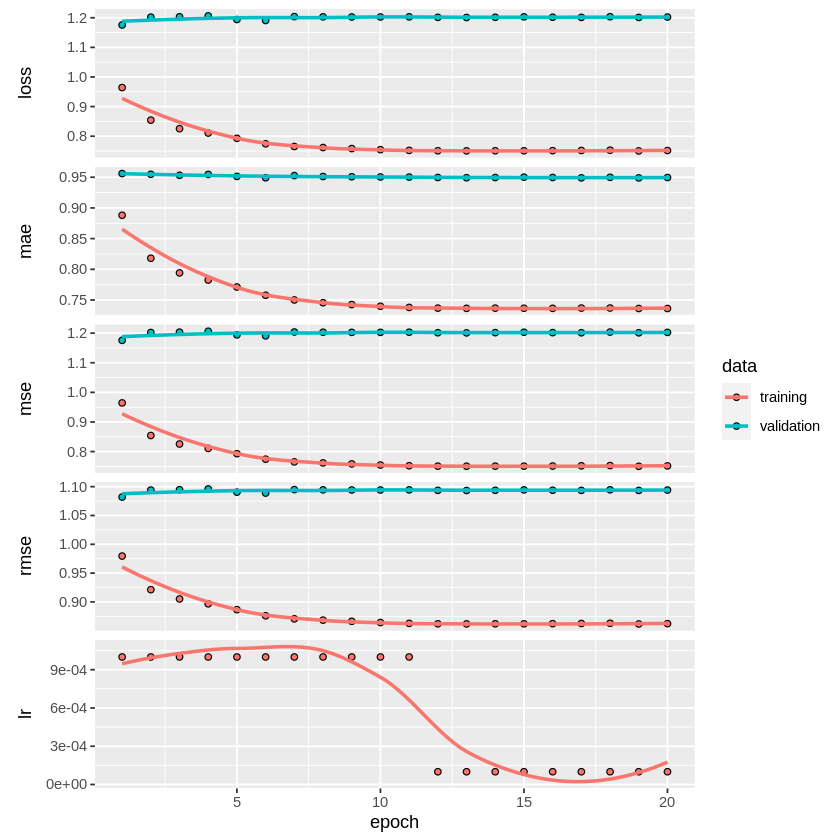

In [45]:
plot(history_0)

In [39]:
# Muestra de validación:
forward_chain_cv <- function(s){
  # quantiles dependientes del número de divisiones que se pase (s):
  q <- seq(1/s, 1, 1/s)

  # Cálculo de las fechas correspondientes a cada cuantil
  time_points <-
    do.call(quantile,
            list(as.POSIXct(as.Date(qc_data_sel_wl[[1]])), q))

  # Listas para conener las funciones generadoras
  train_ks <- list()
  val_ks <- list()

  # Vectores para guardar el número de steps de cada cadena:
  train_cvsteps <- c()
  val_cvsteps <- c()

  # Loop a lo largo de los percentiles de tiempo:
  for(i in 1:(length(time_points)-1)){

  # Workflow aplicado a cada forward chain:

    train_n <- qc_data_sel_wl %>%
      subset(.[[1]] < time_points[i]) %>%
      normalize_train(.)

    val_n <- qc_data_sel_wl %>%
      subset(.[[1]] > time_points[i] & .[[1]] <= time_points[i+1]) %>%
      norm_test_val(., means = train_n$means, stds = train_n$stdev)
    ###################################################################
    train_code <- code_cat_var(train_n$scaled_data[,-c(3:16, 19)])
    val_code <- code_cat_var(val_n[,-c(3:16, 19)])
    ###################################################################

    # Crear una lista de funciones generadoras para cada cadena:

    train_k <- create_lstm_data.2(
        data = as.matrix(train_code$data[,-1]),
        lookback = lookback,
        delay = delay,
        batch_size = batch_size,
        min_index = 1,
        max_index = NULL,
        predseries = predseries)

    train_cvsteps <- rbind(train_cvsteps,
                           round((nrow(train_code$data)-lookback) /
                                   batch_size))

    val_k <- create_lstm_data.2(
        data = as.matrix(val_code$data[,-1]),
        lookback = lookback,
        delay = delay,
        batch_size = batch_size,
        min_index = 1,
        max_index = NULL,
        predseries = predseries)

    val_cvsteps <- rbind(val_cvsteps,
                         round((nrow(val_data)-lookback) / batch_size))

    train_ks[[i]] <- train_k

    val_ks[[i]] <- val_k

    train_ks %>% setNames(paste0("train_", i, sep = ""))
  }

  chain <- list(train_ks, val_ks)
  names(chain) <- c("train", "val")
  chain$trainst <- train_cvsteps
  chain$valst <- val_cvsteps

  return(chain)

}


In [40]:
chain <- forward_chain_cv(4)

`summarise()` has grouped output by 'ANALIZADOR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ANALIZADOR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ANALIZADOR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ANALIZADOR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ANALIZADOR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ANALIZADOR'. You can override using the
`.groups` argument.


In [29]:
history <- list()

for (i in 1:length(chain$train)) {

  file_name <- paste0("lstm_QC_", i, ".cv")
  model <- model_0


  history[[i]] <- model_0 %>%
    fit_generator(
      generator = chain$train[[i]],
      steps_per_epoch = chain$trainst[[i]],
      epochs = 1,
      validation_data = chain$val[[i]],
      validation_steps = chain$valst[[i]],
      callbacks = callbacks
    )
}

Warning message in fit_generator(., generator = chain$train[[i]], steps_per_epoch = chain$trainst[[i]], :
“`fit_generator` is deprecated. Use `fit` instead, it now accept generators.”
Warning message in fit_generator(., generator = chain$train[[i]], steps_per_epoch = chain$trainst[[i]], :
“`fit_generator` is deprecated. Use `fit` instead, it now accept generators.”
Error occurred in generator: subscript out of bounds



ERROR: ignored

In [ ]:
history <- list()

for (i in 1:length(chain$train)) {

  # Cargamos el modelo naive sin entrenar:
  model <- load_model_hdf5(file.path(resultsdir,"naive_model"),
                         custom_objects = list("rmse" = rmse),
                         compile = T)
  file_name <- paste0("lstm_QC_", i, ".cv")
  # Entrenamos
  history[[i]] <- model %>%
    fit_generator(
      generator = chain$train[[i]],
      steps_per_epoch = chain$trainst[[i]],
      epochs = 15,
      validation_data = chain$val[[i]],
      validation_steps = chain$valst[[i]],
      callbacks = list(
  callback_tensorboard(log_dir=file.path(resultsdir, "run_a")
                      # write_grads = T,
                      # histogram_freq = 1,
                      # update_freq = "batch",
                      # write_images = T
                      ),
  callback_model_checkpoint(file.path(resultsdir, file_name),
                            monitor= "rmse",
                            mode="min",
                            verbose=1,
                            save_best_only = TRUE),
  callback_reduce_lr_on_plateau(monitor = "val_loss", factor = 0.1,
                                patience = 10, min_lr = 0.000001),
  callback_early_stopping(monitor = "val_loss", patience = 20,
                          verbose = 1)
  )
    )
  plot(history[[i]])
}

In [ ]:
set.seed(123)
# Evaluación del modelo:
path <- file.path(resultsdir, file_name)
model <- load_model_hdf5(path,
                         custom_objects = list("rmse" =
                                                 rmse),
                         compile = T)
evaluation_result <- evaluate(model_0, test_k, steps = test_steps)

evaluation_result

In [26]:
evaluation_result <- evaluate(model_0, test_k, steps = test_steps)
evaluation_result

loss       mae       mse      rmse 
1.1914427 0.9517252 1.1914427 1.0900463

# Evaluación

In [ ]:
set.seed(123)
# Evaluación del modelo:
path <- file.path(resultsdir, file_name)
model <- load_model_hdf5(path,
                         custom_objects = list("rmse" =
                                                 rmse),
                         compile = T)
evaluation_result <- evaluate(model, test_k, steps = test_steps)

evaluation_result


### Línea base de sentido común

In [ ]:
# Función para calcular el MAE promedio para un modelo basado en predecir los targets del set de validación con las mismas muestras de validación, mediante la iteración de lotes de muestras. Esto sería equivalente a un modelo que predice el resultado futuro del QC con el actual y constituye el punto de partida para mejorar (common sense baseline).

evaluate_naive_method <- function() {
  batch_mae <- c()
  batch_mse <- c()
  batch_rmse <- c()
  for (step in 1:val_steps) {
    c(samples, targets) %<-% val_k()
    preds <- samples[,dim(samples)[[2]],2]
    mae <- mean(abs(preds - targets))
    mse <- mean((preds - targets)^2)
    rmse <- sqrt(mse)
    batch_mae <- c(batch_mae, mae)
    batch_mse <- c(batch_mse, mse)
    batch_rmse <- c(batch_rmse, rmse)
  }
  naive_mse <- mean(batch_mse)
  naive_mae <- mean(batch_mae)
  naive_rmse <- mean(batch_rmse)
  cat("naive_mae", mae, "\n",
      "naive_mse", mse, "\n",
      "naive_rmse", rmse)
  naive <- list(naive_mae, naive_mse, naive_rmse)
  names(naive) <- c("mae", "mse", "rmse")
  return(naive)

}


# mae y mse del modelo naive:
naive <- evaluate_naive_method()

# mae del modelo LSTM:
mae <- evaluation_result[2]

eval_model <- cbind(train_n$stdev[[2]], train_n$stdev[[1]],
                    train_n$stdev[[3]],
                    naive$mae*train_n$stdev[[3]],
                    mae*train_n$stdev[[3]])

colnames(eval_model) <- c("CODIGO_PRUEBA", "ANALIZADOR",
                          "SD","NAIVE_MAE*SD","MAE*SD")

# Imprimir los resultados de evaluación:

sink(file.path(resultsdir, paste0("lstm_QC_", format(Sys.time(),
                                                    "%Y%m%d_%H%M%S"),
                                  ".eval")))

naive
evaluation_result
eval_model

# Cerrar el archivo de salida
sink()


In [ ]:
# Evaluación por categorías.

# Función para seleccionar los índices en test_indx que corresponden a una combinación determinada de CODIGO_PRUEBA, NIVEL Y ANALIZADOR:

index_select <- function() {

  # Opciones para elegir CLC, NIVEL y ANALIZADOR:
  clc_opt <- test_code$levels$CODIGO_PRUEBA
  level_opt <- test_code$levels$NIVEL
  anal_opt <- test_code$levels$ANALIZADOR

  # Introducción de la fecha por el usuario:
  #date <- readline(
   # "fecha del día anterior a la predicción (aaaa-mm-dd): ")
  #if(!date %in% as.Date(test_code$data$TIEMPO_QC))
   #  print("fecha no incluida en dataset")

  # Introducción de prueba, nivel y analizador:
  clc <- clc_opt[menu(clc_opt,
                      title = "Código CLC de prueba: ",
                      graphics = T)]
  level <- level_opt[menu(level_opt,
                          title = "Nivel de QC: ",
                          graphics = T)]
  anal <- anal_opt[menu(anal_opt,
                        title = "Analizador: ",
                        graphics = T)]

  cat("Indice correspondiente a la prueba: ", clc, "\n",
  "nivel: ", level, "\n",
  "analizador: ", anal, "\n")

  # Conversión de las variables introducidas en índice:

  col_clc <- which(grepl(clc, names(test_indx)))-16
  col_level <- which(grepl(paste0("NIVEL_", level), names(test_indx)))-16
  col_anal <- which(grepl(anal, names(test_indx)))-16
  pos <- list(col_clc, col_level, col_anal)

  code <- rep(0, length(categorical_vars+2))

  for (i in seq_along(pos)) {
    code[pos[[i]]] <- 1
  }
  code <- paste0(as.character(code), collapse = "")

  index <- code_dictionary$index[match(code,
                                       code_dictionary$code)]
  print(index)
  return(index)

}

index_pred <- index_select()

  test_pred <- lapply(index_pred, function(idx) {
    create_lstm_data.2(
      data = as.matrix(test_indx[test_indx[,"index"] == idx,
                                 -c(1, 3:16, length(test_indx))]),
      lookback = lookback,
      delay = delay,
      batch_size = batch_size,
      min_index = min_index,
      max_index =
      nrow(as.matrix(test_indx[test_indx[,"index"] == idx,]))-delay-1,
      predseries = predseries)
  }
  )


In [ ]:
# Obtener las series y sus predicciones utilizando la función generadora de tests por categorías y obtener la predicción del modelo:
x <- test_pred[[1]]()[[1]]
y_pred <-  predict(model, x = x)
y_true <- test_pred[[1]]()[[2]]

metrics <- list(
  MSE <- mse(actual = y_true, predicted = y_pred),
  MAE <- mae(actual = y_true, predicted = y_pred),
  Correlación <- cor(y_pred, y_true)
)
names(metrics) <- c("MSE", "MAE", "Coef. correlación")
metrics

# Crear el gráfico de dispersión entre y_pred e y_true
plot(y_true, y_pred, pch = 16, col = "blue", xlab = "y_true", ylab = "y_pred",
     main = "Gráfico de dispersión: y_true vs. y_pred")

# Calcular el coeficiente de correlación
correlacion <- cor(y_true, y_pred)

# Agregar el coeficiente de correlación al gráfico
texto_cor <- paste("Correlación:", round(correlacion, 2))
mtext(texto_cor, side = 3, line = -2.5)


In [ ]:
# Calcular las métricas de todas las categorías:

global_metrics <- list()

for(i in seq_along(test_k)){

  # Calcula x, y_true e y_pred a partir de la primera iteración de las funciones generadoras y el modelo:
  x <- test_k[[i]]()[[1]]
  y_true <- test_k[[i]]()[[2]]
  y_pred <-  predict(model, x = x)

  metrics <- list(
  MSE <- mse(actual = y_true, predicted = y_pred),
  MAE <- mae(actual = y_true, predicted = y_pred),
  Correlación <- cor(y_pred, y_true)
  )

  names(metrics) <- c("MSE", "MAE", "Coef. correlación")
  global_metrics[[i]] <- metrics

}

names(global_metrics) <- index_values

# Crear un gráfico para cada elemento de las sublistas en global_metrics
for (i in 1:3) {
  plot(1:length(global_metrics),
       sapply(global_metrics, "[[", i),
       pch = 16,
       xlab = "Index",
       ylab = names(global_metrics[[1]][i])
  )
}



In [ ]:
# Función para hacer la búsqueda inversa de analizador, prueba y nivel a partir de un index:

reverse_index_select <- function(index) {
  # Buscar el código correspondiente al índice
  code <- code_dictionary$code[match(index, code_dictionary$index)]

  # Extraer los dígitos de code
  digits <- strsplit(code, "")[[1]]

  # Encontrar las posiciones de los 1 en la secuencia de dígitos
  pos_anal <- which(digits == "1")[1]
  pos_clc <- which(digits == "1")[2]
  pos_level <- which(digits == "1")[3]

  # Obtener los valores de anal, clc y level
  anal <- names(test_indx)[16 + pos_anal]
  clc <- names(test_indx)[16 + pos_clc]
  level <- names(test_indx)[16 + pos_level]

  # Devolver los valores encontrados
  result <- list(CÓDIGO_PRUEBA = substr(clc, 15, 22),
                 NIVEL = level,
                 ANALIZADOR = anal)
  return(result)
}


In [ ]:
# Búsqueda de casos con métricas por debajo de la media:

limit_mse <- mse
limit_mae <- mae
limit_coef <- 0.7

cases <- c()  # Lista para almacenar los índices

for (i in seq_along(global_metrics)) {

  sublist <- global_metrics[[i]]

  # Extracción de métricas:
  mse_i <- sublist$MSE
  mae_i <- sublist$MAE
  coef_i <- sublist$`Coef. correlación`

  if (mse_i >= limit_mse & mae_i >= limit_mae &
      coef_i <= limit_coef) {
    cases <- c(cases, i)  # Agregar el índice a la lista
  }
}

# Imprimir los índices encontrados

print(cases)

# Transformar índices a información de casos:

selection <-list()

for(i in seq_along(cases))
selection[[i]] <- reverse_index_select(cases[i])


```

In [52]:
#system("apt-get install -y libmagick++-dev")
#devtools::install_github("rstudio/keras")
#devtools::install_github("rstudio/tensorflow")
#devtools::install_github('EagerAI/kerastuneR')
#library(keras)
#library(tensorflow)
#system("pip install keras-tuner")
#install_keras()
#install_tensorflow()


ERROR: ignored

In [54]:
?fit_tuner